# **i. Introduction**

Name: Yocia Meiko Oke

Batch: RMT-036

Dataset: [house-price-v2.csv](https://github.com/FTDS-assignment-bay/p1-ftds036-rmt-g4-ymo98/blob/main/house-price-v2.csv)

Dataset Description: This dataset contains information about the price of a house sold on a property sales website so that there is a possibility that a real estate agent advertises the same house with the aim of selling the house faster([reference](https://github.com/FTDS-assignment-bay/p1-ftds036-rmt-g4-ymo98?tab=readme-ov-file#dataset-description)).

**Background**  

PT. Rumah Baru Keluarga offers property buying services, with properties sold by several home agents. The advantages of the services provided by PT. Rumah Baru Keluarga include unlimited, free home price inquiries for customers, a fast home ownership documentation process, and precise home purchase cost estimation services. Because of these benefits, many people trust our company when purchasing a new home.

**SMART**  

- Specific: Focus on increasing customer satisfaction by improving our home purchase cost estimation service.

- Measurable: Increase the customer satisfaction rating by 50%.

- Achievable: Providing a precise home purchase cost estimation services.

- Relevant: By increasing customer satisfaction hopefully we can also close more deals with buyers, increasing revenue.

- Time-bound: Goal achieved by the end of 2025.

**Problem Statement**  

The goal is to increase customer satisfaction by 50% by the end of 2025 through improving our home purchase cost estimation service, which will not only enhance precision but also help close more deals, ultimately boosting revenue.

**Objective**

To develop a predictive model that estimates the price of a house based on its attributes (e.g., location, number of rooms, area, etc.).

This model will help the company estimate the price of a property that matches the buyer's criteria.

# **ii. Import Libraries**

First we will import all libraries and modules that we are going to use in this project.

In [1]:
# Import libraries
import pandas as pd # for data manipulation & analysis
import numpy as np # for numerical computations
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for advanced visualizations
from scipy import stats # for relation analysis (chi-squared)
from sklearn.model_selection import train_test_split # to split the dataset to train and test
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler # numerical feature scaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder # categorical feature encoder
from sklearn.linear_model import LinearRegression # model
from sklearn.metrics import mean_absolute_error # calculating error, for model evaluation
from feature_engine.outliers import Winsorizer # handling outliers
from statsmodels.stats.outliers_influence import variance_inflation_factor # for vif
import statsmodels.api as sm # for vif
from scipy.stats import kendalltau, pearsonr # correlation
import pickle # save model
import json # save cols


In [2]:
# for vif
!pip install pandas statsmodels

# **iii. Data Loading**

In this section, we will load the data for further data exploration and modelling. 

The data loading process includes giving a new name to each column, checking the dataset size, and a very basic data exploratory.

In [3]:
# Load dataset
df_ori = pd.read_csv("house-price-v2.csv")

# Duplicate dataset
df = df_ori.copy()

# Show data
df

,area,city,lattitude,logitude,property_type,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,voltage,building_age,year,condition,garage,carport,price
0,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,4.0,239.0,272.0,2.0,0.0,1.0,shm - sertifikat hak milik,4400 mah,5.0,2017.0,bagus,0,0,2.990000e+09
1,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,2.0,55.0,69.0,2.0,0.0,0.0,hgb - hak guna bangunan,2200 mah,6.0,2016.0,bagus,0,1,1.270000e+09
2,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,119.0,131.0,2.0,1.0,1.0,hgb - hak guna bangunan,2200 mah,1.0,2021.0,bagus,1,1,1.950000e+09
3,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,180.0,174.0,2.0,1.0,1.0,shm - sertifikat hak milik,3500 mah,6.0,2016.0,bagus sekali,1,0,3.300000e+09
4,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,3.0,328.0,196.0,2.0,1.0,1.0,shm - sertifikat hak milik,3500 mah,9.0,2013.0,bagus,1,1,4.500000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,Jombang,Tangerang,-6.296615,106.704601,rumah,2.0,1.0,72.0,36.0,1.0,0.0,0.0,shm - sertifikat hak milik,1300 mah,0.0,2022.0,baru,1,1,5.880000e+08
3030,Lengkong Kulon,Tangerang,-6.283454,106.638775,rumah,3.0,2.0,85.0,60.0,2.0,0.0,0.0,shm - sertifikat hak milik,1300 mah,0.0,2022.0,baru,0,1,7.850000e+08
3031,Lengkong Kulon,Tangerang,-6.283454,106.638775,rumah,3.0,2.0,78.0,60.0,2.0,0.0,0.0,shm - sertifikat hak milik,1300 mah,0.0,2022.0,baru,0,1,7.550000e+08
3032,BSD Provance Parkland,Tangerang,-6.288237,106.665859,rumah,3.0,2.0,60.0,65.0,2.0,0.0,0.0,shm - sertifikat hak milik,2200 mah,0.0,2022.0,baru,0,1,8.000000e+08


In [4]:
df.columns

Index(['area', 'city', 'lattitude', 'logitude', 'property_type', 'bedrooms',
       'bathrooms', 'land_area', 'building_area', 'floors', 'maid_bedrooms',
       'maid_bathrooms', 'certificate', 'voltage', 'building_age', 'year',
       'condition', 'garage', 'carport', 'price'],
      dtype='object')

In [5]:
# Check dataset using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3034 entries, 0 to 3033
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            3034 non-null   object 
 1   city            3034 non-null   object 
 2   lattitude       3034 non-null   float64
 3   logitude        3034 non-null   float64
 4   property_type   3034 non-null   object 
 5   bedrooms        3007 non-null   float64
 6   bathrooms       3012 non-null   float64
 7   land_area       3034 non-null   float64
 8   building_area   3034 non-null   float64
 9   floors          3033 non-null   float64
 10  maid_bedrooms   3034 non-null   float64
 11  maid_bathrooms  3034 non-null   float64
 12  certificate     2937 non-null   object 
 13  voltage         3034 non-null   object 
 14  building_age    3034 non-null   float64
 15  year            3034 non-null   float64
 16  condition       3034 non-null   object 
 17  garage          3034 non-null   i

There are 6 columns of `object` type:
- `area`: the specific area of the property
- `city`: the city of the property
- `property_type`: the type of property
- `certificate`: the type of property certification
- `voltage`: the electricity capacity of the property, measured in mah
- `condition`:the overall condition of the property

2 columns of `integer` type:
- `garage`: whether the property has a garage (1 = Yes, 0 = No).
- `carport`: whether the property has a carport (1 = Yes, 0 = No).

12 columns of `float` type:
- `bedrooms`: The number of bedrooms
- `bathrooms`: The number of bathrooms
- `floors`: The number of floors
- `maid_bedrooms`: The number of bedrooms for housemaids.
- `maid_bathrooms`: The number of bathrooms for housemaids.
- `year`: The year when the property was built
- `latitude`: The geographic latitude coordinate of the property
- `longitude`: The geographic longitude coordinate of the property
- `land_area`: The land area of the property
- `building_area`: The building area of the property
- `building_age`: The age of the building in years
- `price`: The price of the property

In the dataset, there is an `object` column that would be more appropriate as a `float` column, which is the `voltage` column. Therefore, we will first remove the unit "mAh" and change the type to an integer.

In [6]:
# Column 'voltage': Erase 'mah' and convert to floar
df['voltage'] = df['voltage'].str.replace(' mah', '').astype(float)
df

,area,city,lattitude,logitude,property_type,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,voltage,building_age,year,condition,garage,carport,price
0,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,4.0,239.0,272.0,2.0,0.0,1.0,shm - sertifikat hak milik,4400.0,5.0,2017.0,bagus,0,0,2.990000e+09
1,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,2.0,55.0,69.0,2.0,0.0,0.0,hgb - hak guna bangunan,2200.0,6.0,2016.0,bagus,0,1,1.270000e+09
2,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,119.0,131.0,2.0,1.0,1.0,hgb - hak guna bangunan,2200.0,1.0,2021.0,bagus,1,1,1.950000e+09
3,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,180.0,174.0,2.0,1.0,1.0,shm - sertifikat hak milik,3500.0,6.0,2016.0,bagus sekali,1,0,3.300000e+09
4,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,3.0,328.0,196.0,2.0,1.0,1.0,shm - sertifikat hak milik,3500.0,9.0,2013.0,bagus,1,1,4.500000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,Jombang,Tangerang,-6.296615,106.704601,rumah,2.0,1.0,72.0,36.0,1.0,0.0,0.0,shm - sertifikat hak milik,1300.0,0.0,2022.0,baru,1,1,5.880000e+08
3030,Lengkong Kulon,Tangerang,-6.283454,106.638775,rumah,3.0,2.0,85.0,60.0,2.0,0.0,0.0,shm - sertifikat hak milik,1300.0,0.0,2022.0,baru,0,1,7.850000e+08
3031,Lengkong Kulon,Tangerang,-6.283454,106.638775,rumah,3.0,2.0,78.0,60.0,2.0,0.0,0.0,shm - sertifikat hak milik,1300.0,0.0,2022.0,baru,0,1,7.550000e+08
3032,BSD Provance Parkland,Tangerang,-6.288237,106.665859,rumah,3.0,2.0,60.0,65.0,2.0,0.0,0.0,shm - sertifikat hak milik,2200.0,0.0,2022.0,baru,0,1,8.000000e+08


In [7]:
df.columns

Index(['area', 'city', 'lattitude', 'logitude', 'property_type', 'bedrooms',
       'bathrooms', 'land_area', 'building_area', 'floors', 'maid_bedrooms',
       'maid_bathrooms', 'certificate', 'voltage', 'building_age', 'year',
       'condition', 'garage', 'carport', 'price'],
      dtype='object')

In [8]:
df['city'].unique()

array([' Bekasi', ' Bogor', ' Depok', ' Jakarta Barat',
       ' Jakarta Selatan', ' Jakarta Utara', ' Jakarta Timur',
       ' Jakarta Pusat', ' Tangerang'], dtype=object)

The final columns will be categorized as:
- Numerical column = ['lattitude', 'logitude', 'bedrooms', 'bathrooms', 'land_area', 'building_area', 'floors', 'maid_bedrooms', 'maid_bathrooms', 'voltage', 'building_age', 'year', 'price']
- Categorical nominal = ['area', 'city', 'property_type', 'certificate']
- Categorical encoded = ['garage', 'carport']
- Categorical ordinal = ['condition']

## Check Duplicates

Now, we will check if the dataset has any duplicates, if it does, we will drop all the duplicated data since it doesn't hold any insightful values as they are all redudant.

In [9]:
# Check duplicates
df.duplicated().sum()

183

In [10]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
# Re-check after dropping duplicates
df.duplicated().sum()

0

# **iv. Exploratory Data Analysis (EDA)**

Here, we will do exploratory data analysis to understand the data better, what can we get from the data, and lastly to see if we need to do extra step to extract more information in the Feature Engineering step.

We will create visualizations for each column. First, we are going to separate the numerical columns into two categories: those with a wide range and those with a small range (with fewer than 10 unique values).

This will help determine the appropriate visualizations to use later.

In [12]:
# Check unique values of numerical columns to decide what visualization to use for each column

num_wide = [] # for numerical columns with wide range
num_small = [] # for numerical columns with small range

for col in df.columns:
    if df[col].dtype == 'float64':
        unique = df[col].value_counts().count()
        print(f"Unique value counts of '{col}': {unique}")
        if unique > 10:
            num_wide.append(col)
        else:
            num_small.append(col)

Unique value counts of 'lattitude': 373
Unique value counts of 'logitude': 374
Unique value counts of 'bedrooms': 18
Unique value counts of 'bathrooms': 16
Unique value counts of 'land_area': 426
Unique value counts of 'building_area': 318
Unique value counts of 'floors': 5
Unique value counts of 'maid_bedrooms': 6
Unique value counts of 'maid_bathrooms': 5
Unique value counts of 'voltage': 29
Unique value counts of 'building_age': 40
Unique value counts of 'year': 40
Unique value counts of 'price': 629


In [13]:
print(num_wide)
print(num_small)

['lattitude', 'logitude', 'bedrooms', 'bathrooms', 'land_area', 'building_area', 'voltage', 'building_age', 'year', 'price']
['floors', 'maid_bedrooms', 'maid_bathrooms']


Based on the count of the unique value of each columnm, we will categorize the data into these categories, and then make a visualization loop for each category.

Numerical column:
- Wide range: ['lattitude', 'logitude', 'bedrooms', 'bathrooms', 'land_area', 'building_area', 'voltage', 'building_age', 'year', 'price']
- Small range: ['floors', 'maid_bedrooms', 'maid_bathrooms']

Categorical column: ['area', 'city', 'property_type', 'certificate', 'garage', 'carport', 'condition']

**Numerical columns with wide range**

Here we will create 2 visualization for each column:

- Histogram > to see the distribution of the data
- Boxplot > to see if there is any outliers

We also want to take a more general look at the `voltage` column, hence we will make a **pie chart** by clustering the voltage values into:  
- Golongan R-1 : 450 VA - 2200 VA
- Golongan R-2 : 3300 VA - 5500 VA
- Golongan R-3 : 6600 VA above

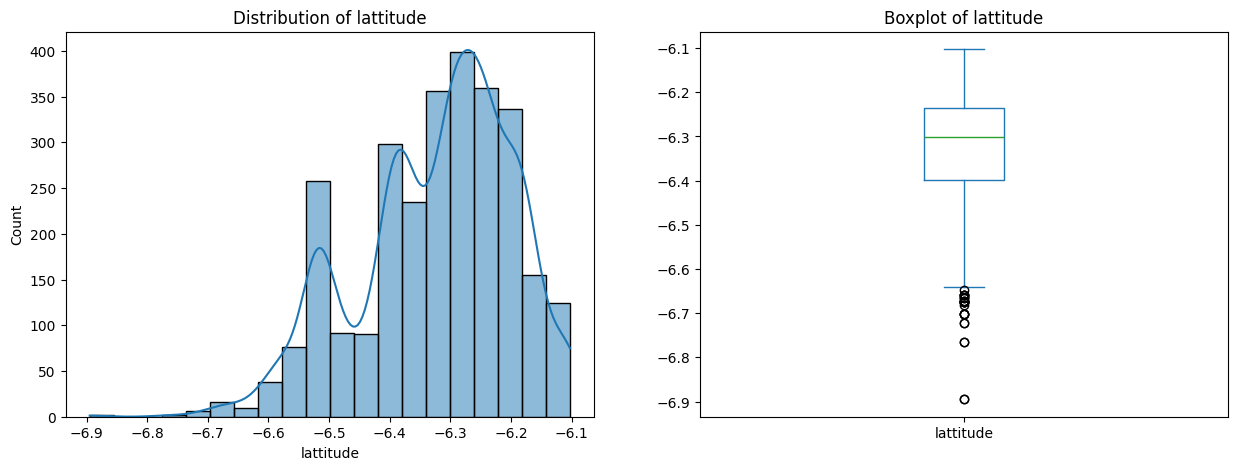

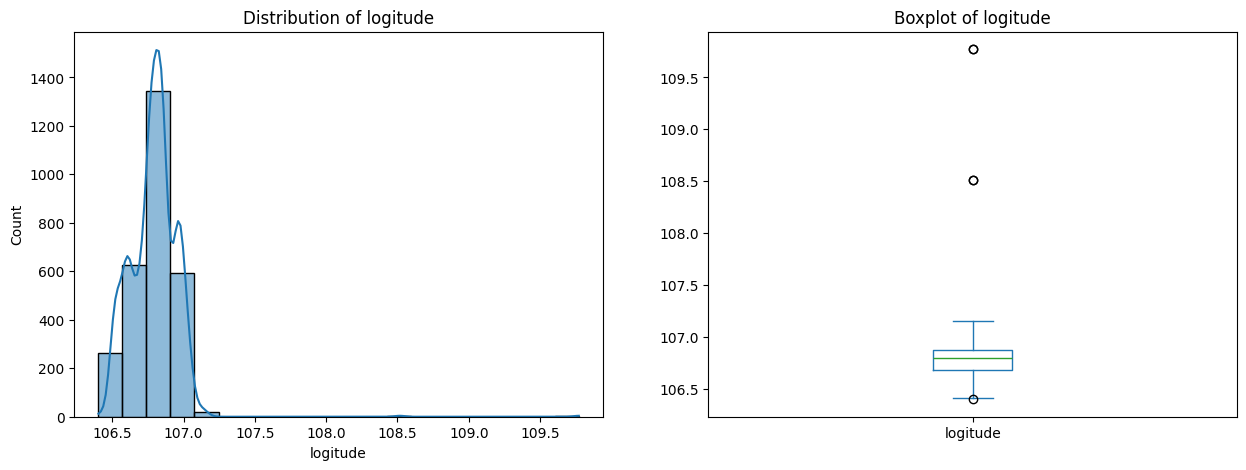

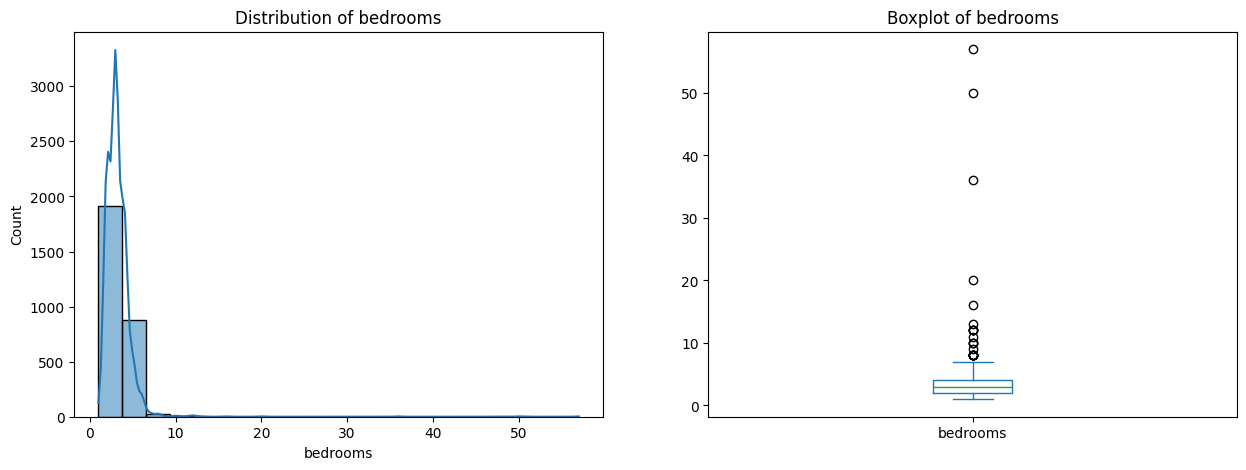

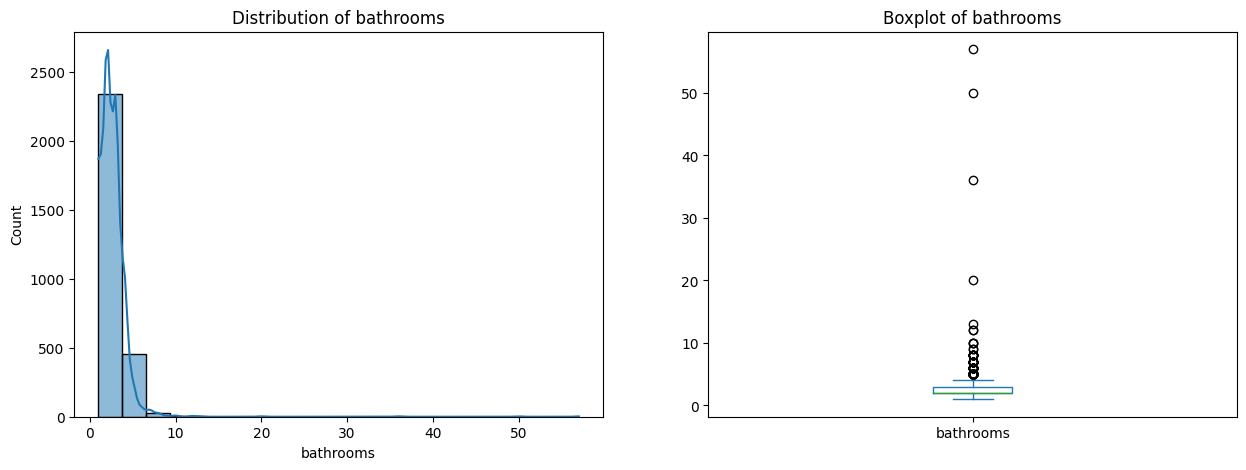

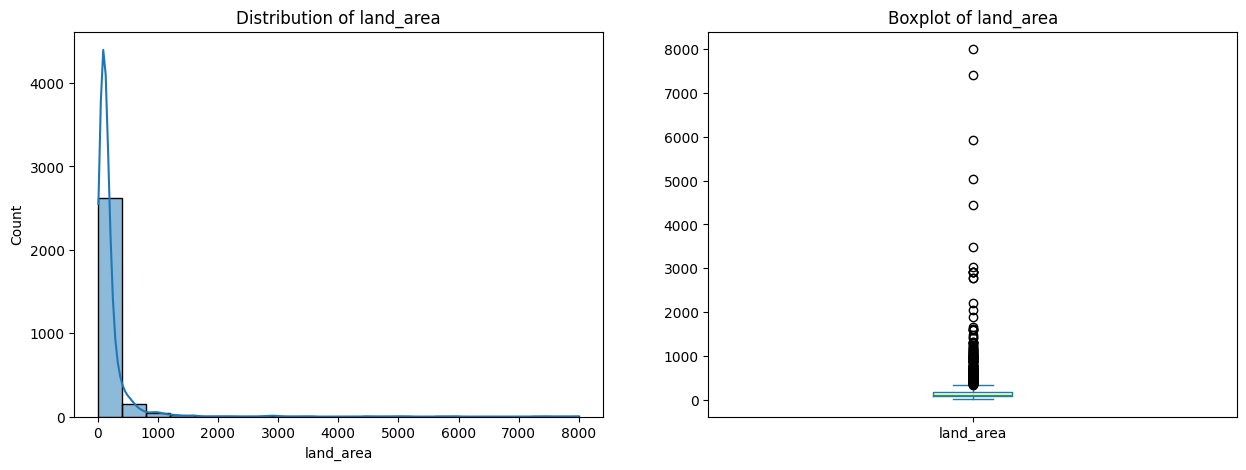

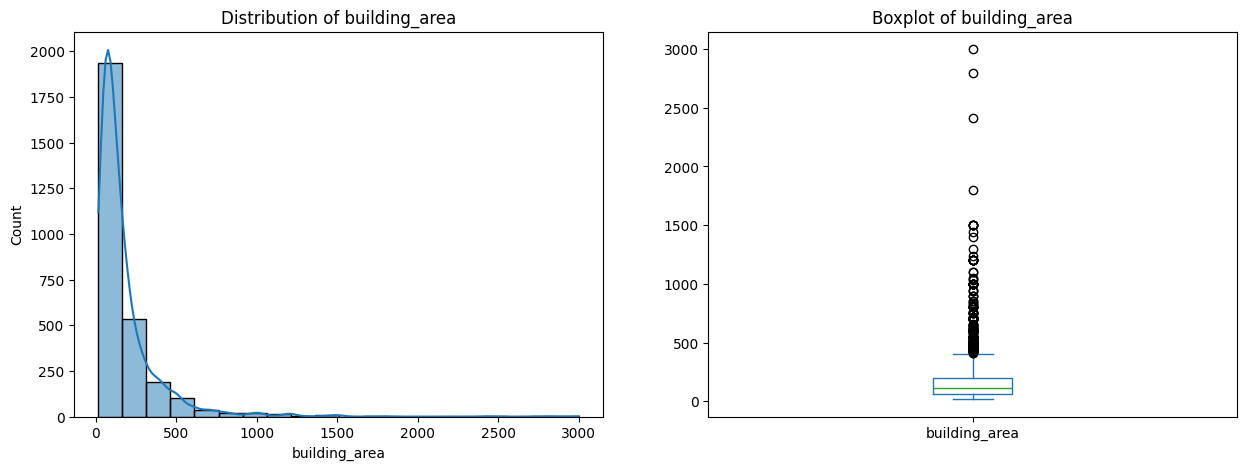

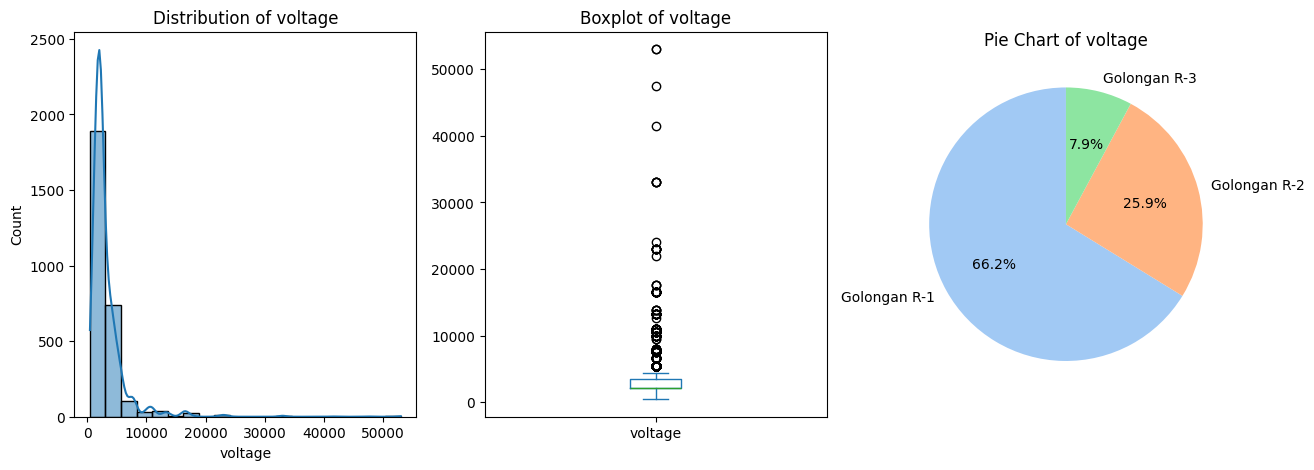

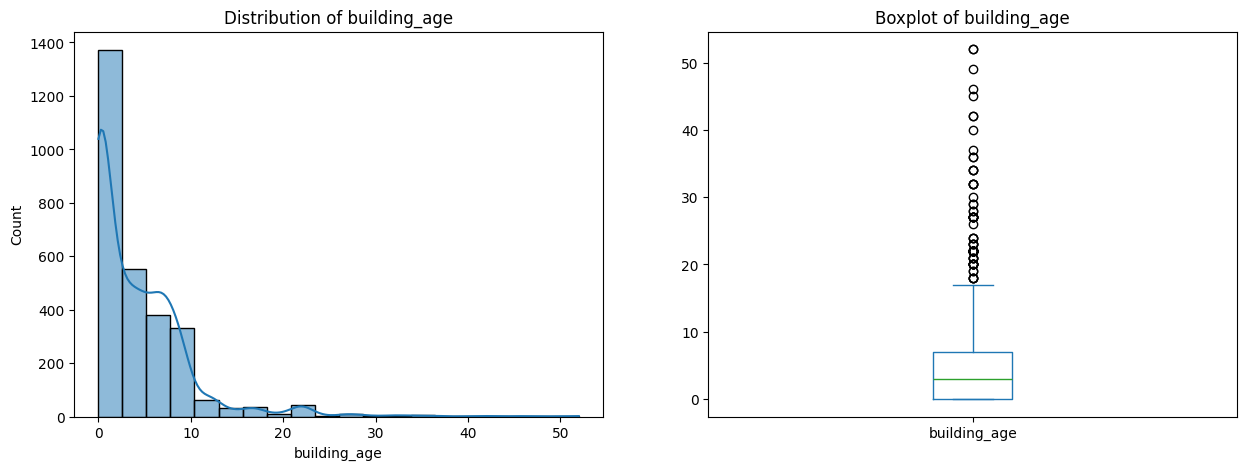

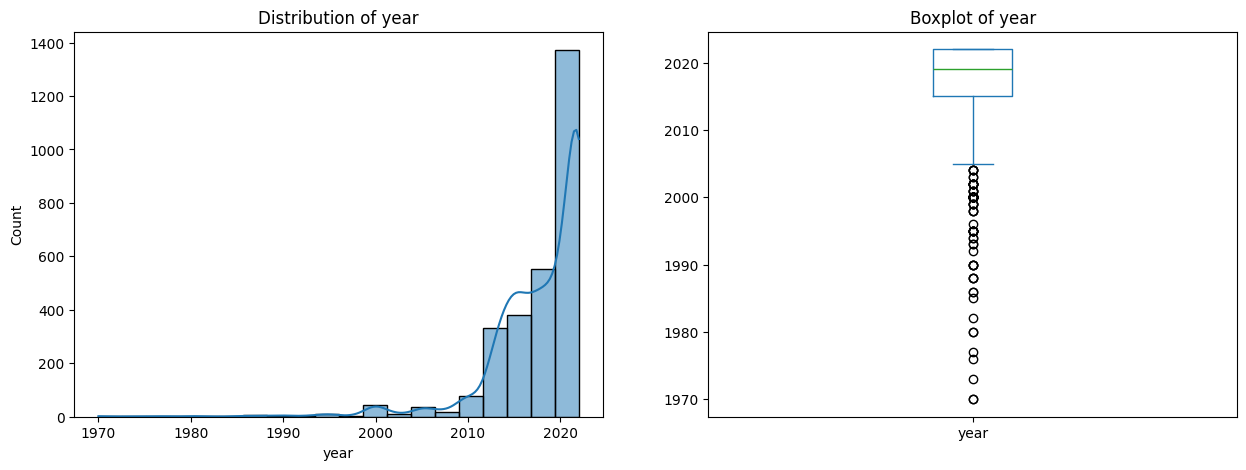

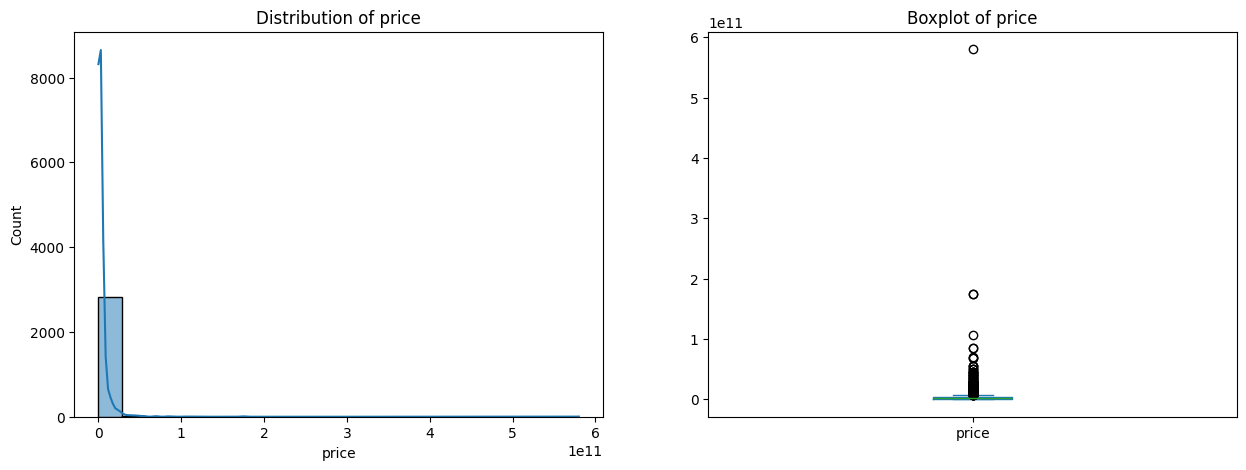

In [14]:
# Wide range numerical column
for col in num_wide:
    if col == 'voltage': # if the column is 'voltage' then create a pie chart
        # Create canvas
        plt.figure(figsize=(15,5))

        # Plot histogram for the column 'voltage'
        plt.subplot(1,3,1)
        sns.histplot(df[col], kde=True,bins=20)
        plt.title(f'Distribution of {col}')
        plt.xlabel(f'{col}')

        # Plot boxplot for the column 'voltage'
        plt.subplot(1,3,2)
        df[col].plot(kind='box')
        plt.title(f'Boxplot of {col}')
        
        # 'voltage' Pie Chart
        # Create categories using query method
        r1 = df.query('450 <= voltage <= 2200')
        r2 = df.query('3300 <= voltage <= 5500')
        r3 = df.query('voltage >= 6600')

        # Dictionary with labels
        category_counts = {
            'Golongan R-1': len(r1),
            'Golongan R-2': len(r2),
            'Golongan R-3': len(r3)
        }

        # Pie chart
        pastel_colors = sns.color_palette('pastel')
        plt.subplot(1,3,3)
        plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', colors=pastel_colors, startangle=90)
        plt.title(f'Pie Chart of {col}')
        
        # Show
        plt.show()

    else:
        # Create canvas
        plt.figure(figsize=(15,5))

        # Plot histogram for the column
        plt.subplot(1,2,1)
        sns.histplot(df[col], kde=True,bins=20)
        plt.title(f'Distribution of {col}')
        plt.xlabel(f'{col}')

        # Plot boxplot for the column
        plt.subplot(1,2,2)
        df[col].plot(kind='box')
        plt.title(f'Boxplot of {col}')
        
        # Show
        plt.show()

**Insights**

From the visualizations, we can see that:  
- Right-skewed columns: `lattitude`, `year`
- Left-skewed columns: `logitude`, `bedrooms`, `bathrooms`, `land_area`, `building_area`, `voltage`, `building_age`, `price` (price is the target column)
- Normal: There is no columns with normal distribution

Just as a quick insight, we can understand that although the majority of the property have same property price, there are a few properties with a really high price compared to the rest of the data.

Also, in this dataset, the majority of the properties were built quiet recently (2010~2020), however, there we also have a few properties that are built way before 2010.

**Numerical columns with small range**

Here we will create a visualization for each column:

- Histogram > to see the distribution of the data

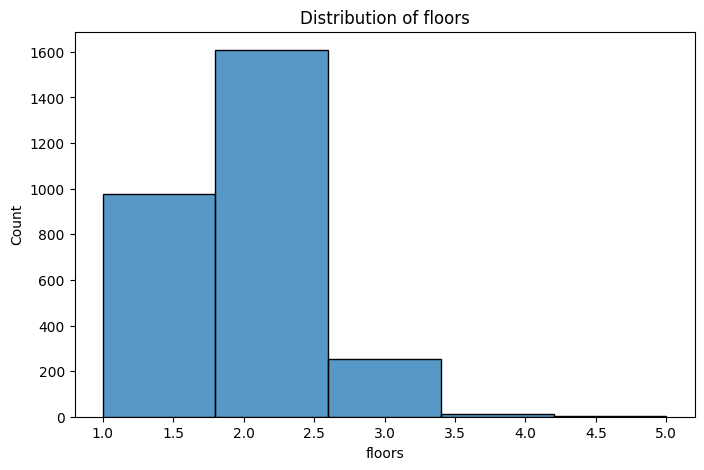

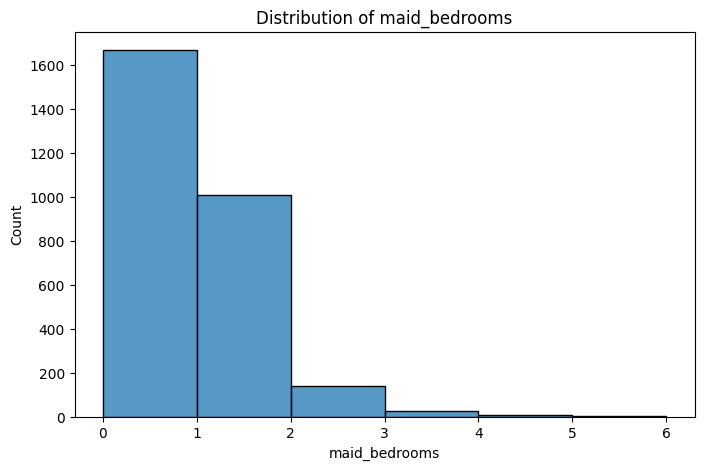

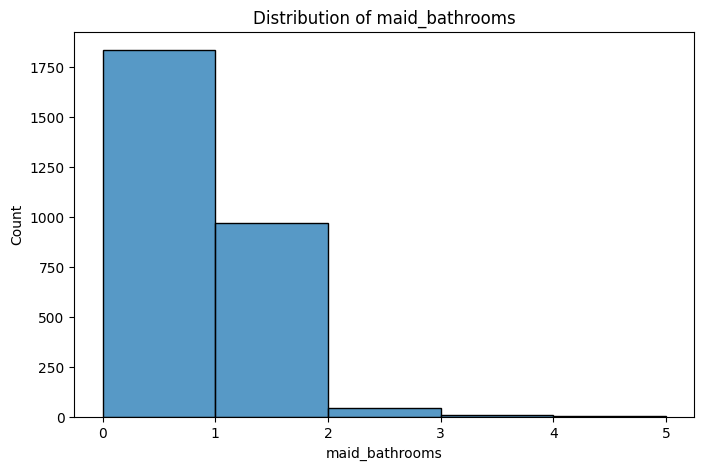

In [15]:
# Small range numerical column
for col in num_small:

    # Create a canvas
    plt.figure(figsize=(8,5))

    # Plot histogram for the column
    sns.histplot(df[col], bins=df[col].nunique())
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')
    
    # Show
    plt.show()

**Categorical columns**

Here we will create 2 visualization for each column:

- Countplot > to see the distribution of the data
- Pie chart > to see the percentage of groups in a column

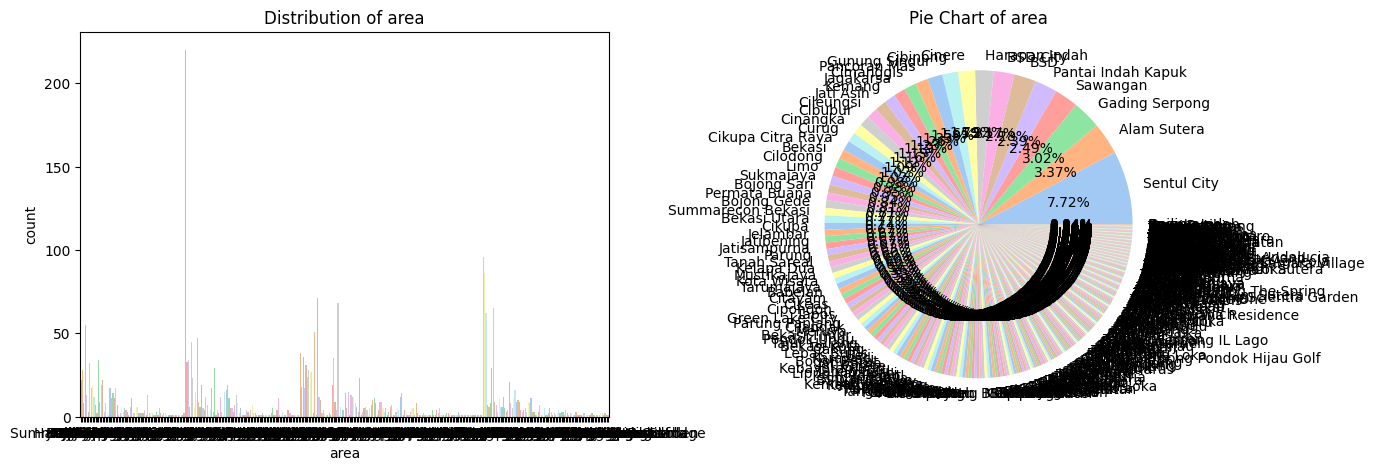

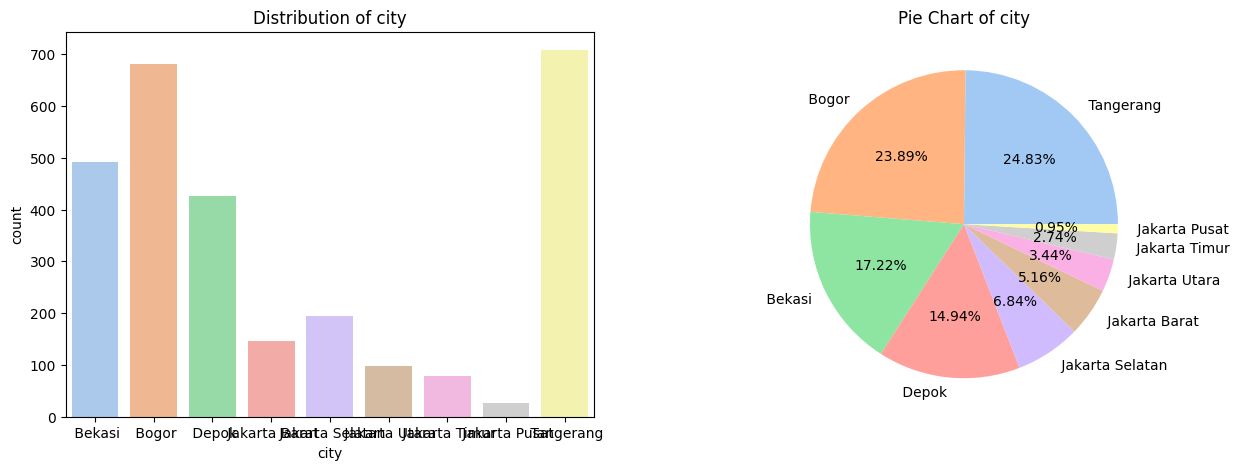

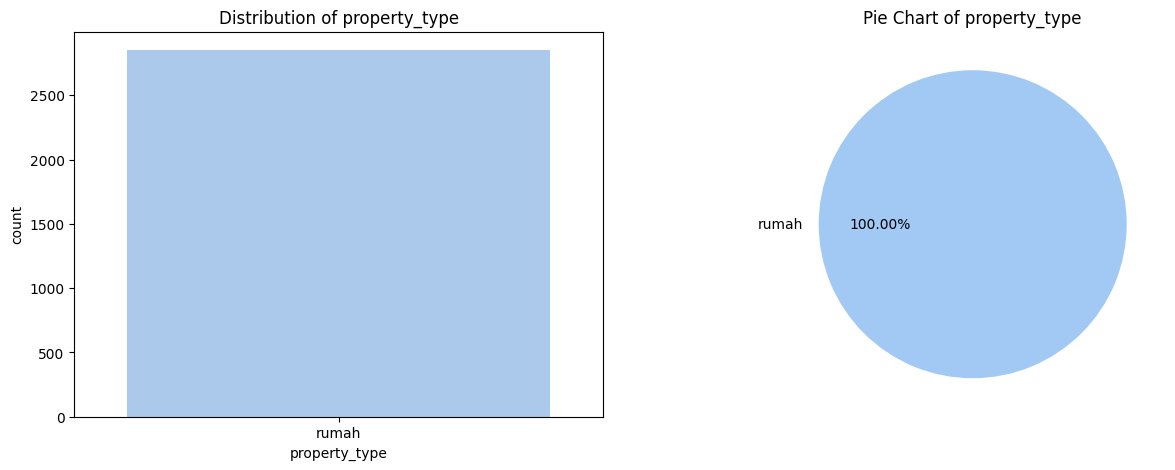

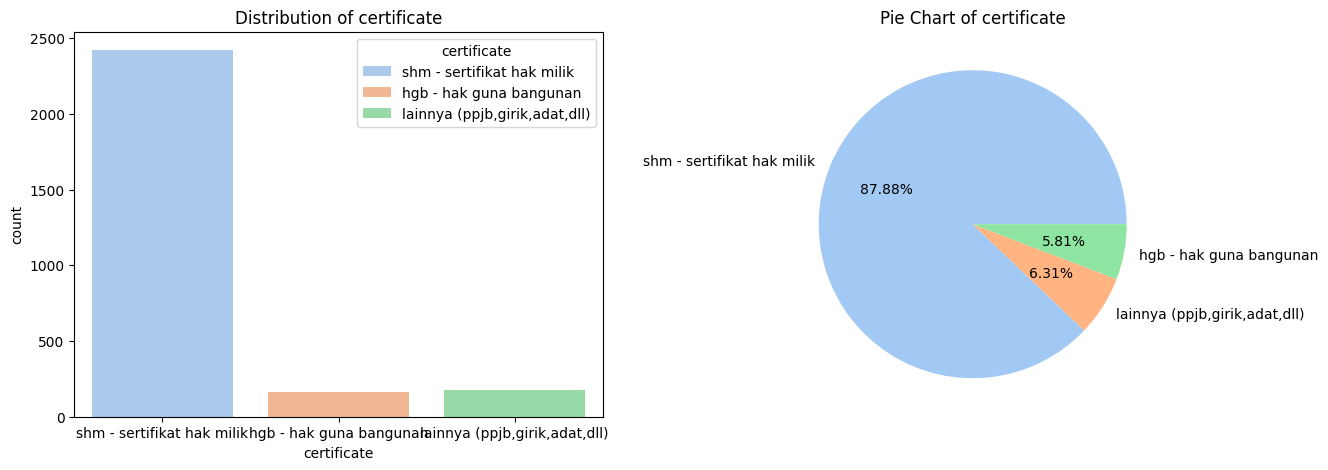

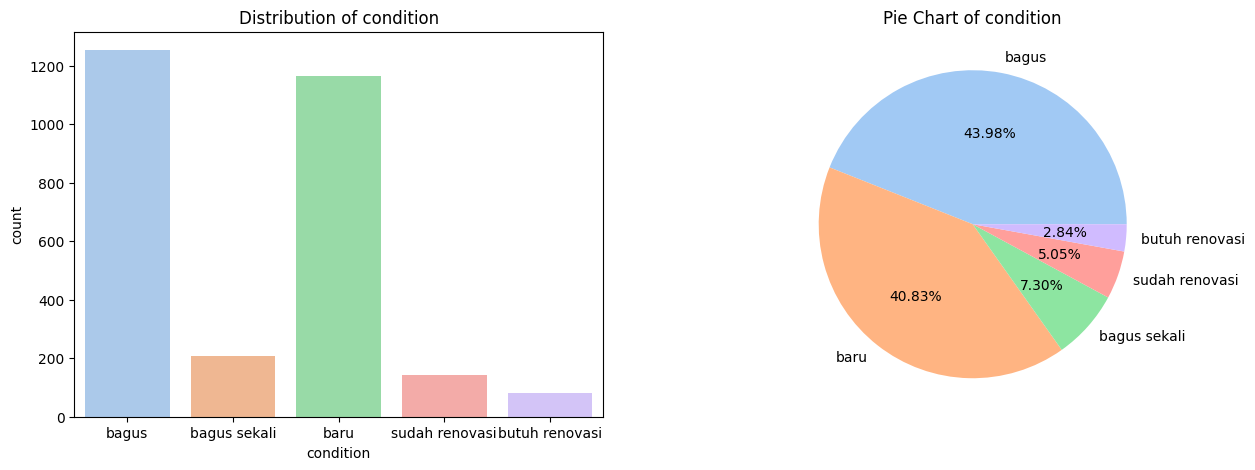

In [16]:
# Categorical column
for col in df.columns:
    if df[col].dtype == 'object':
        # Create canvas
        plt.figure(figsize=(15,5))

        # Countplot
        plt.subplot(1,2,1)
        sns.countplot(x=df[col], palette='pastel', hue=df[col])
        plt.title(f'Distribution of {col}')

        # Pie Chart
        plt.subplot(1,2,2)
        counts = df[col].value_counts()  # Get counts of smoker vs non-smoker
        pastel_colors = sns.color_palette('pastel')
        counts.plot.pie(autopct='%1.2f%%', colors=pastel_colors)
        plt.title(f'Pie Chart of {col}')
        plt.ylabel("")

        # Show
        plt.show()

**Insights**

From the visualizations, we can see that:  
- `area` : The majority of the properties are located specifically in Sentul City (7.72%)
- `city` : The TOP 3 areas with the highest number of properties are Tangerang, Bogor, and Bekasi
- `property_type`: All properties are rumah (house)
- `certificate` : All properties are owned, and the certificate is sertifikat hak milik, so one they are sold, the ownership of the house will be passed on to the buyer 
- `condition`: 43.98% of the properties are in bagus (good) condition and 2.84% are needed to be renovated.

**Encoded Categorical columns**

Here we will create 2 visualization for each column:
- Countplot > to see the distribution of the data


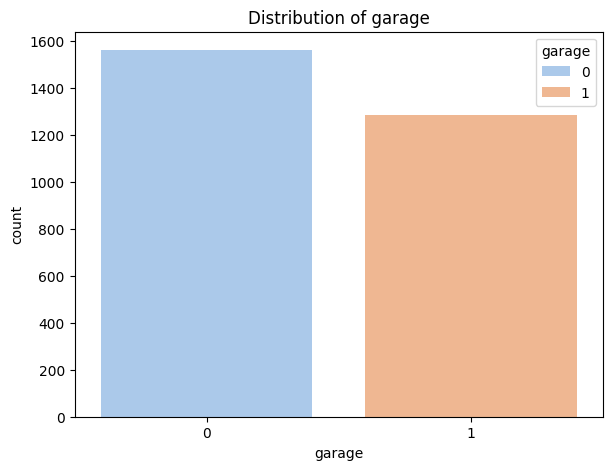

In [17]:
# Create canvas
plt.figure(figsize=(15,5))

# Countplot
plt.subplot(1,2,1)
sns.countplot(x=df['garage'], palette='pastel', hue=df['garage'])
plt.title(f'Distribution of garage')

# Show
plt.show()

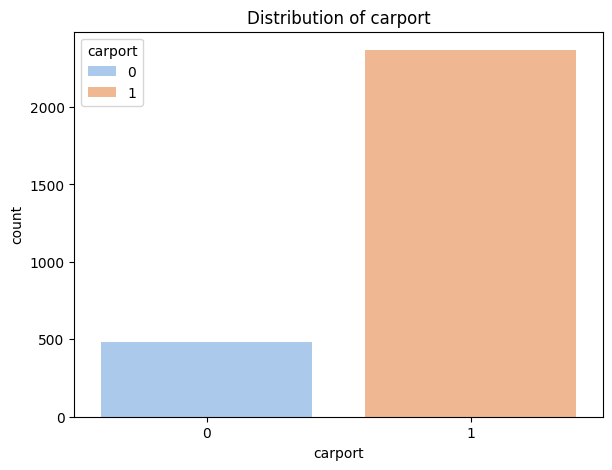

In [18]:
# Create canvas
plt.figure(figsize=(15,5))

# Countplot
plt.subplot(1,2,1)
sns.countplot(x=df['carport'], palette='pastel', hue=df['carport'])
plt.title(f'Distribution of carport')

# Show
plt.show()

**Answering Specific Objectives**

1. Voltage Pie Chart with clusters (refer to Visualization section):

- Golongan R-1 : 450 VA - 2200 VA
- Golongan R-2 : 3300 VA - 5500 VA
- Golongan R-3 : 6600 VA - ke atas

    **Insights**

    Most properties fall under Golongan R-1, which means the electricity capacity ranges from 450 VA to 2200 VA. Therefore, PT. Rumah Baru Keluarga can specifically target potential buyers with electricity needs within this range.

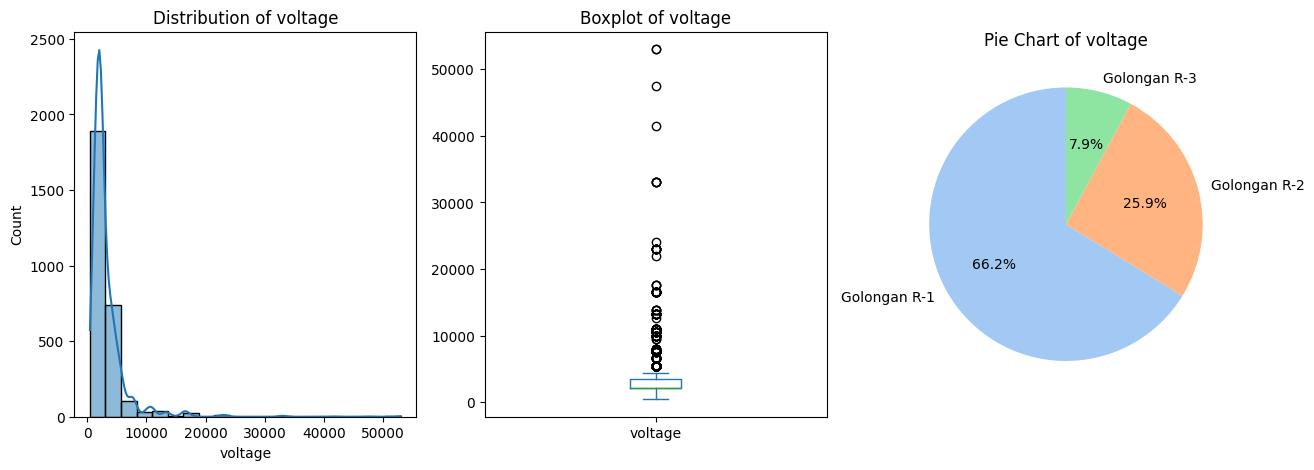

2. According to a source, a definition of **a luxury house is a house with a minimum building area of 300 m²**. 

    We want to see the **top 5 areas with the most luxury houses** based on the available dataset, we will also **display the average price for each of these areas**.

    **Insights**

    Based on the query, we found that the Top 5 area with the most luxury houses are:  
    - Sentul City
    - Pantai Indah Kapuk
    - Kemang
    - BSD
    - Alam Sutera

In [19]:
df[df['building_area'] >= 300].groupby('area').agg({'building_area': 'count', 'price': 'mean'}).rename(columns={'building_area': 'building_count_above_300'}).sort_values(by='building_count_above_300', ascending=False).head(5)

,building_count_above_300,price
area,,
Sentul City,66,1.021667e+10
Pantai Indah Kapuk,33,2.020606e+10
Kemang,23,2.140435e+10
BSD,19,1.420000e+10
Alam Sutera,14,1.078929e+10


3. A client, Mr. Slamet, is looking for a house to live in. Due to their limited finances, they assume that houses built before the year 2000 will be significantly cheaper due to the building age. We want to help Mr. Slamet by finding out if that assumption is true and if we can really say that houses built before 2000 are indeed cheaper.

    We will do this by doing a **Hypothesis Testing (one-tailed, so we will divide the p-value by 2)**.

    The hypothesis is formulated as follows:

    - H0: The price of property build before 2000 ≥ The price of property build after 2000

    - H1: The price of property build before 2000 < The price of property build after 2000

In [20]:
# Splitting the house prices built before 2000 and after 2000
before_2000_price = df[df['year'] < 2000]['price']
after_2000_price = df[df['year'] >= 2000]['price']

# Calculate t_stat and p value
t_stat, p_val = stats.ttest_ind(before_2000_price, after_2000_price)

print('T-Statistic:',t_stat)
print('P-value:',p_val/2)

T-Statistic: 3.231547802870149
P-value: 0.0006226215344893721


- **T-Statistic (3.2315)** means there is a significant difference between the average house prices before and after the year 2000. However, since the t-statistic is positive, it means the houses built before 2000 are actually more expensive than those built after 2000.

- **P-Value (0.00062)** the p-value is very small, suggesting that the difference is statistically significant and it’s unlikely that the difference in prices is due to random chance.

**Conclusion**
Given the t-statistic and p-value, the data does not support the hypothesis that houses built before 2000 are cheaper. Instead, the results indicate that houses built **before 2000 may be more expensive**.

So, we better not recommend the houses built before the year 2000 to Mr. Slamet.

In [21]:
# Show houses built before 2000 and the price, short by price from the most expensive to least
slamet_house = df[df['year'] < 2000][['year','price']].sort_values(by='price', ascending=True)
print(f'The number of houses built before year 2000:  {len(slamet_house)}')
slamet_house.head(10)

The number of houses built before year 2000:  38


,year,price
2606,1999.0,6.100000e+08
1177,1995.0,1.370000e+09
2687,1990.0,1.500000e+09
2248,1973.0,1.500000e+09
2925,1995.0,1.800000e+09
2097,1976.0,1.880000e+09
1239,1970.0,1.900000e+09
3003,1988.0,2.300000e+09
2630,1992.0,2.350000e+09
3006,1999.0,2.400000e+09


There are 38 houses built before 2000 with the lowest price being **Rp 610.000.000**.

**EDA Insights on Data**

After doing the EDA, there are some thing we better do to make the model more efficient later on.

- Since the unique value of `property_type` is only one, and each row has the same value, we better drop this column.

- Based on domain knowledge, we will drop the column `year` since it represents the same information as `building_age`.

In [22]:
df.drop(columns=['property_type'],inplace=True)
df.drop(columns=['year'],inplace=True)

# **v. Feature Engineering**

> This section contains the data preparation process for model training, such as splitting the data into training and testing sets, data transformations (normalization, encoding, etc.), and other necessary processes.

## v.i Feature Creation: Cardinality Check

In [23]:
# Checking the number of unique values in categorcial columns
for col in df.columns:
    if df[col].dtype == 'object':
      print(f'Number of categories in the variable {col}: {len(df[col].unique())}')

Number of categories in the variable area: 364
Number of categories in the variable city: 9
Number of categories in the variable certificate: 4
Number of categories in the variable condition: 5


From the data above, we can see that the column `area` has a high cardinality. 

We want to check the relation between area and city, to see if they represent the same thing.

We will do this by using **Relation Analysis with Chi-Squared test, since these are categorical columns**.

In [24]:
# Creating contingency table
contingency_table = pd.crosstab(df['area'], df['city'])
contingency_table

city,Bekasi,Bogor,Depok,Jakarta Barat,Jakarta Pusat,Jakarta Selatan,Jakarta Timur,Jakarta Utara,Tangerang
area,,,,,,,,,
Alam Sutera,0,0,0,0,0,0,0,0,96
Ampera,0,0,0,0,0,6,0,0,0
Angke,0,0,0,1,0,0,0,0,0
Antasari,0,0,0,0,0,1,0,0,0
BSD,0,0,0,0,0,0,0,0,65
...,...,...,...,...,...,...,...,...,...
Tigaraksa,0,0,0,0,0,0,0,0,2
Tirtajaya,0,0,2,0,0,0,0,0,0
Tomang,0,0,0,1,0,0,0,0,0


In [25]:
# Chiq-squared Test
result = stats.chi2_contingency(contingency_table)
print("P-value:", result.pvalue)

if p_val < 0.05:
    print("The p-value indicates a significant relationship between 'city' and 'area'.")
else:
    print("The p-value indicates no significant relationship between 'city' and 'area'.")


P-value: 0.0
The p-value indicates a significant relationship between 'city' and 'area'.


Since the p-value is 0.0, it means that they both contains same information, we will drop `area` column since it has high cardinality, and the values have already been represented in `city` column anyway.

In [26]:
# Group by city to see how latitude, longitude, and area vary within cities
city_group = df.groupby('city').agg({
    'lattitude': 'nunique',
    'logitude': 'nunique',
    'area': 'nunique'
})
print(city_group)

                 lattitude  logitude  area
city                                      
Bekasi                  70        70    70
Bogor                   79        79    82
Depok                   28        28    28
Jakarta Barat           33        33    33
Jakarta Pusat            7         7     8
Jakarta Selatan         38        38    38
Jakarta Timur           21        21    21
Jakarta Utara            9         9     9
Tangerang               90        91    92


Looking at the data above, we can say that both lattitude and logitude are okay to be dropped since they also say about the area.

In [27]:
df.drop(columns=['area','lattitude','logitude'],inplace=True)

## v.ii Feature Extraction

> We will not be doing feature extraction since it is not needed

## v.iii Split X (features) dan y (target)

In [28]:
# Split between x and y
X = df.drop(['price'], axis=1)
y = df.price

## v.iv Split between Train and Test

In [29]:
# Splitting between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=107)

print('train size:', X_train.shape)
print('test size:', X_test.shape)
print(X_train)

train size: (2280, 14)
test size: (571, 14)
                  city  bedrooms  bathrooms  land_area  building_area  floors  \
1685             Depok       3.0        2.0       72.0           75.0     2.0   
1595             Depok       2.0        1.0      108.0           90.0     1.0   
2547         Tangerang       3.0        2.0       85.0           60.0     2.0   
2249     Jakarta Timur       4.0        3.0      145.0          125.0     2.0   
373             Bekasi       3.0        2.0      120.0           88.0     1.0   
...                ...       ...        ...        ...            ...     ...   
1639             Depok       3.0        2.0      120.0           79.0     2.0   
2879         Tangerang       5.0        4.0      632.0          317.0     2.0   
480             Bekasi       2.0        1.0       60.0           42.0     1.0   
499             Bekasi       3.0        2.0      200.0          143.0     2.0   
2272   Jakarta Selatan       5.0        5.0      680.0         12

## v.v Feature Transformation: Handling Outlier

Checking skewness of numerical columns

In [30]:
# Check Skewness

# Numerical columns
num_cols = list(X_train.select_dtypes(exclude='object').columns)

# List of encoded columns to exclude
encoded_col = ['garage', 'carport']
num_cols = [col for col in num_cols if col not in encoded_col]

listItem= []

for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])

skewness = pd.DataFrame(columns=['Column Name', 'Skewness Score', 'Distribution'], data= listItem)
skewness

,Column Name,Skewness Score,Distribution
0,bedrooms,12.9,skewed
1,bathrooms,11.4,skewed
2,land_area,8.6,skewed
3,building_area,4.3,skewed
4,floors,0.3,normal
5,maid_bedrooms,1.5,skewed
6,maid_bathrooms,1.3,skewed
7,voltage,6.3,skewed
8,building_age,2.8,skewed


Floor is the only column that has normal distribution.

In [31]:
# Get upper, lower boundaries and percentage of outliers
column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['Column Name'][row]

  #Checking upper and lower boundary, distance = 3
  if skewness['Distribution'][row] == 'skewed': #Tukey's Rule
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  
  #Append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,bedrooms,10.0,-4.00,0.35
1,bathrooms,6.0,-1.00,1.27
2,land_area,504.0,-252.00,5.96
3,building_area,611.0,-348.00,3.11
4,floors,3.6,-0.11,0.31
5,maid_bedrooms,4.0,-3.00,0.04
6,maid_bathrooms,4.0,-3.00,0.04
7,voltage,7400.0,-1700.00,6.36
8,building_age,28.0,-21.00,0.57


We will do outlier handling for these columns since the percetage is above 5%:

- `land_area`
- `voltage`

In [32]:
winsoriser = Winsorizer(capping_method='quantiles',
                            tail='right',
                            fold=0.05,
                            variables=['land_area','voltage'],
                            missing_values='ignore')

X_train_capped = winsoriser.fit_transform(X_train)
X_test_capped = winsoriser.transform(X_test)

In [33]:
X_train_capped

,city,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,voltage,building_age,condition,garage,carport
1685,Depok,3.0,2.0,72.0,75.0,2.0,0.0,0.0,shm - sertifikat hak milik,2200.0,0.0,bagus,0,1
1595,Depok,2.0,1.0,108.0,90.0,1.0,0.0,0.0,shm - sertifikat hak milik,1300.0,3.0,bagus,1,1
2547,Tangerang,3.0,2.0,85.0,60.0,2.0,0.0,0.0,shm - sertifikat hak milik,1300.0,0.0,baru,0,0
2249,Jakarta Timur,4.0,3.0,145.0,125.0,2.0,1.0,1.0,shm - sertifikat hak milik,2200.0,0.0,baru,1,1
373,Bekasi,3.0,2.0,120.0,88.0,1.0,0.0,0.0,shm - sertifikat hak milik,2200.0,2.0,bagus,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,Depok,3.0,2.0,120.0,79.0,2.0,0.0,0.0,shm - sertifikat hak milik,4400.0,0.0,baru,1,1
2879,Tangerang,5.0,4.0,550.1,317.0,2.0,2.0,1.0,shm - sertifikat hak milik,7700.0,10.0,bagus sekali,1,1
480,Bekasi,2.0,1.0,60.0,42.0,1.0,0.0,0.0,shm - sertifikat hak milik,1300.0,6.0,bagus,0,0
499,Bekasi,3.0,2.0,200.0,143.0,2.0,1.0,1.0,shm - sertifikat hak milik,2200.0,8.0,sudah renovasi,0,1


## v.vi Feature Transformation: Split between numerical and categorical columns

In [34]:
X_train_capped.columns

Index(['city', 'bedrooms', 'bathrooms', 'land_area', 'building_area', 'floors',
       'maid_bedrooms', 'maid_bathrooms', 'certificate', 'voltage',
       'building_age', 'condition', 'garage', 'carport'],
      dtype='object')

In [35]:
# Manually splitting between categories
num_col_normal = ['floors'] # normal numerical colum
num_col_skewed = ['bedrooms', 'bathrooms', 'land_area', 'building_area', 'maid_bedrooms', 'maid_bathrooms', 'voltage', 'building_age'] # skewed numerical colum
cat_col_nominal = ['city', 'certificate'] # nominal categorical column
cat_col_ordinal = ['condition'] # ordinal categorical column
cat_col_encoded = ['garage', 'carport'] # already encoded categorical column

In [36]:
X_train_num_normal = X_train_capped[num_col_normal]
X_test_num_normal = X_test_capped[num_col_normal]

X_train_num_skewed = X_train_capped[num_col_skewed]
X_test_num_skewed = X_test_capped[num_col_skewed]

X_train_cat_nominal = X_train_capped[cat_col_nominal]
X_test_cat_nominal = X_test_capped[cat_col_nominal]

X_train_cat_ordinal = X_train_capped[cat_col_ordinal]
X_test_cat_ordinal = X_test_capped[cat_col_ordinal]

X_train_cat_encoded = X_train_capped[cat_col_encoded]
X_test_cat_encoded = X_test_capped[cat_col_encoded]

## v.vii Feature Transformation: Handling Missing Values

Handling missing values for numerical columns with normal distribution by imputing the **mean**.

In [37]:
# X_train check
X_train_num_normal.isnull().sum()

floors    1
dtype: int64

In [38]:


num_imputer_normal = SimpleImputer(strategy='mean')

# Fit and transform for numerical columns
X_train_num_normal_imputed = num_imputer_normal.fit_transform(X_train_num_normal)
X_test_num_normal_imputed = num_imputer_normal.transform(X_test_num_normal)

Handling missing values for numerical columns with skewed distribution by imputing the **median**.

In [39]:
# X_train check
X_train_num_skewed.isnull().sum()

bedrooms          24
bathrooms         18
land_area          0
building_area      0
maid_bedrooms      0
maid_bathrooms     0
voltage            0
building_age       0
dtype: int64

In [40]:
# Imputer for skewed distribution numerical data with median
num_imputer_skewed = SimpleImputer(strategy='median')

# Fit and transform for numerical columns
X_train_num_skewed_imputed = num_imputer_skewed.fit_transform(X_train_num_skewed)
X_test_num_skewed_imputed = num_imputer_skewed.transform(X_test_num_skewed)

Handling missing values for categorical columns by imputing the **most_frequent**.

In [41]:
# X_train check
X_train_cat_nominal.isnull().sum()

city            0
certificate    74
dtype: int64

In [42]:
# Imputer for categorical data with most_frequent
cat_imputer_nominal = SimpleImputer(strategy='most_frequent')

# Fit and transform for numerical columns
X_train_cat_nominal_imputed = cat_imputer_nominal.fit_transform(X_train_cat_nominal)
X_test_cat_nominal_imputed = cat_imputer_nominal.transform(X_test_cat_nominal)

In [43]:
X_train_cat_nominal_imputed

array([[' Depok', 'shm - sertifikat hak milik'],
       [' Depok', 'shm - sertifikat hak milik'],
       [' Tangerang', 'shm - sertifikat hak milik'],
       ...,
       [' Bekasi', 'shm - sertifikat hak milik'],
       [' Bekasi', 'shm - sertifikat hak milik'],
       [' Jakarta Selatan', 'shm - sertifikat hak milik']], dtype=object)

In [44]:
# X_train check
X_train_cat_ordinal.isnull().sum()

condition    0
dtype: int64

In [45]:
# X_train check
X_train_cat_encoded.isnull().sum()

garage     0
carport    0
dtype: int64

In [46]:
# y_train check
y_train.isnull().sum()

0

In [47]:
# y_test check
y_test.isnull().sum()

0

## v.viii Feature Selection

In [48]:
# Feature selection Numerical columns
p_values = []
interpretation = []
cols = []

X_train_num_normal_imputed = pd.DataFrame(X_train_num_normal_imputed, columns=num_col_normal)

for col in X_train_num_normal_imputed.columns:
  corr_coef, p_value = pearsonr(X_train_num_normal_imputed[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretation .append('Correlated')
  else :
    interpretation .append('Not correlated')

pd.DataFrame({'Column name':cols,
              'Result': interpretation })

,Column name,Result
0,floors,Correlated


In [49]:
# Feature selection Numerical columns
p_values = []
interpretation = []
cols = []

X_train_num_skewed_imputed = pd.DataFrame(X_train_num_skewed_imputed, columns=num_col_skewed)

for col in X_train_num_skewed_imputed.columns:
  corr_coef, p_value = pearsonr(X_train_num_skewed_imputed[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretation.append('Correlated')
  else :
    interpretation.append('Not correlated')

pd.DataFrame({'Column name':cols,
              'Result': interpretation})

,Column name,Result
0,bedrooms,Correlated
1,bathrooms,Correlated
2,land_area,Correlated
3,building_area,Correlated
4,maid_bedrooms,Correlated
5,maid_bathrooms,Correlated
6,voltage,Correlated
7,building_age,Correlated


In [50]:
# Feature selection Categorical columns
p_values = []
interpretation= []
cols = []

X_train_cat_nominal_imputed= pd.DataFrame(X_train_cat_nominal_imputed, columns=cat_col_nominal)

for col in X_train_cat_nominal_imputed.columns:
  corr_coef, p_value = kendalltau(X_train_cat_nominal_imputed[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretation.append('Correlated')
  else :
    interpretation.append('Not correlated')

pd.DataFrame({'Column name':cols,
              'Result': interpretation})

,Column name,Result
0,city,Correlated
1,certificate,Correlated


In [51]:
# Feature selection Categorical columns
p_values = []
interpretation = []
cols = []

for col in X_train_cat_ordinal.columns:
  corr_coef, p_value = kendalltau(X_train_cat_ordinal[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretation.append('Correlated')
  else :
    interpretation.append('Not correlated')

pd.DataFrame({'Column name':cols,
              'Result': interpretation})

,Column name,Result
0,condition,Correlated


In [52]:
# Feature selection Categorical columns
p_values = []
interpretation = []
cols = []

for col in X_train_cat_encoded.columns:
  corr_coef, p_value = kendalltau(X_train_cat_encoded[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretation.append('Correlated')
  else :
    interpretation.append('Not correlated')

pd.DataFrame({'Column name':cols,
              'Result': interpretation})

,Column name,Result
0,garage,Correlated
1,carport,Not correlated


The only column that is not correlated is `carport`, so we will drop it.

In [53]:
X_train_cat_encoded.drop(columns=['carport'],inplace=True)
X_test_cat_encoded.drop(columns=['carport'],inplace=True)

/var/folders/3z/qyqjqk8x2958m89clktdczw40000gn/T/ipykernel_13531/319361664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_encoded.drop(columns=['carport'],inplace=True)
/var/folders/3z/qyqjqk8x2958m89clktdczw40000gn/T/ipykernel_13531/319361664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_encoded.drop(columns=['carport'],inplace=True)


In [54]:
# carport is now dropped 
X_train_cat_encoded

,garage
1685,0
1595,1
2547,0
2249,1
373,0
...,...
1639,1
2879,1
480,0
499,0


## v.ix Feature Transformation: Feature Scaling

Here we will scale the numerical columns:

For data with a normal distribution, we will use StandardScaler, and for skewed data, we will use MinMaxScaler.

Reference [https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/]



In [55]:
# Define scaling method
scaler_normal = StandardScaler()

# . transform
X_train_num_normal_scaled = scaler_normal.fit_transform(X_train_num_normal_imputed.values)
X_test_num_normal_scaled = scaler_normal.transform(X_test_num_normal_imputed)

In [56]:
# Define scaling method
scaler_skewed = MinMaxScaler()

# . transform
X_train_num_skewed_scaled = scaler_skewed.fit_transform(X_train_num_skewed_imputed.values)
X_test_num_skewed_scaled = scaler_skewed.transform(X_test_num_skewed_imputed)

## v.x Feature Transformation: Feature Encoding

Here we will encode the categorical columns:

- Nominal categorical column with OneHotEncoder: `city`, `certificate`  
    OneHotEncoder would create three binary columns: one for each city, with 1 indicating that city and 0 otherwise.
    
- Ordinal categorical column with OrdinalEncoder: `condition`  
    OrdinalEncoder would assign numbers like 1, 2, 3, and 4, maintaining the relationship between the categories.

In [57]:
X_train_cat_nominal_imputed = pd.DataFrame(X_train_cat_nominal_imputed, columns=cat_col_nominal)

In [58]:
X_train_cat_nominal_imputed.city.unique()

array([' Depok', ' Tangerang', ' Jakarta Timur', ' Bekasi', ' Bogor',
       ' Jakarta Pusat', ' Jakarta Selatan', ' Jakarta Barat',
       ' Jakarta Utara'], dtype=object)

In [59]:
X_train_cat_nominal_imputed.certificate.unique()

array(['shm - sertifikat hak milik', 'lainnya (ppjb,girik,adat,dll)',
       'hgb - hak guna bangunan'], dtype=object)

In [60]:
X_train_cat_nominal_imputed

,city,certificate
0,Depok,shm - sertifikat hak milik
1,Depok,shm - sertifikat hak milik
2,Tangerang,shm - sertifikat hak milik
3,Jakarta Timur,shm - sertifikat hak milik
4,Bekasi,shm - sertifikat hak milik
...,...,...
2275,Depok,shm - sertifikat hak milik
2276,Tangerang,shm - sertifikat hak milik
2277,Bekasi,shm - sertifikat hak milik
2278,Bekasi,shm - sertifikat hak milik


In [61]:
# Encode Nominal Categorical column
encoder_nominal = OneHotEncoder(categories=[
    [' Depok', ' Tangerang', ' Jakarta Timur', ' Bekasi', ' Bogor', ' Jakarta Pusat', ' Jakarta Selatan', ' Jakarta Barat', ' Jakarta Utara'],  # for column 1
    ['shm - sertifikat hak milik', 'lainnya (ppjb,girik,adat,dll)', 'hgb - hak guna bangunan']  # for column 2
], handle_unknown='ignore', sparse_output=False)

# Fit and transform on the training set
X_train_cat_nominal_encoded = encoder_nominal.fit_transform(X_train_cat_nominal_imputed.values)

# Only transform on the test set
X_test_cat_nominal_encoded = encoder_nominal.transform(X_test_cat_nominal_imputed)

In [62]:
X_train_cat_ordinal.condition.unique()

array(['bagus', 'baru', 'butuh renovasi', 'sudah renovasi',
       'bagus sekali'], dtype=object)

In [63]:
# Encode Ordinal Categorical column
encoder_ordinal = OrdinalEncoder(categories=[['butuh renovasi', 'sudah renovasi', 'bagus', 'bagus sekali', 'baru']])

# Fit and transform on the training set
X_train_cat_ordinal_encoded = encoder_ordinal.fit_transform(X_train_cat_ordinal)

# Only transform on the test set
X_test_cat_ordinal_encoded = encoder_ordinal.transform(X_test_cat_ordinal)

## v.xi Concat Final Data

In [64]:
# Concatenate for X_train_final
X_train_final = np.concatenate([
    X_train_num_normal_scaled, 
    X_train_num_skewed_scaled, 
    X_train_cat_nominal_encoded, 
    X_train_cat_ordinal_encoded, 
    X_train_cat_encoded
], axis=1)


X_test_final = np.concatenate([
    X_test_num_normal_scaled, 
    X_test_num_skewed_scaled, 
    X_test_cat_nominal_encoded, 
    X_test_cat_ordinal_encoded, 
    X_test_cat_encoded
], axis=1)

In [65]:
X_train_final

array([[ 0.41487071,  0.04081633,  0.02040816, ...,  0.        ,
         2.        ,  0.        ],
       [-1.20135211,  0.02040816,  0.        , ...,  0.        ,
         2.        ,  1.        ],
       [ 0.41487071,  0.04081633,  0.02040816, ...,  0.        ,
         4.        ,  0.        ],
       ...,
       [-1.20135211,  0.02040816,  0.        , ...,  0.        ,
         2.        ,  0.        ],
       [ 0.41487071,  0.04081633,  0.02040816, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.03109353,  0.08163265,  0.08163265, ...,  0.        ,
         2.        ,  1.        ]])

# **vi. Model Definition**

In [66]:
# Define model
model_lin = LinearRegression()

# **vii. Model Training**

In [67]:
# Train the model
model_lin.fit(X_train_final,y_train)

LinearRegression()

# **viii. Model Evaluation**

In [68]:
# Predict Train and test

y_pred_train = model_lin.predict(X_train_final)
y_pred_test = model_lin.predict(X_test_final)

print(y_pred_train)

[-3.35544320e+08  2.08037478e+09  2.34881024e+08 ... -7.04643072e+08
  2.14748365e+09  3.65072220e+10]


In [69]:
y_train

1685    9.950000e+08
1595    9.600000e+08
2547    7.850000e+08
2249    2.550000e+09
373     1.500000e+09
            ...     
1639    1.600000e+09
2879    1.250000e+10
480     2.500000e+08
499     2.300000e+09
2272    7.000000e+10
Name: price, Length: 2280, dtype: float64

In [70]:
# Evaluate the model
print('Error - train:', mean_absolute_error(y_train, y_pred_train))
print('Error - test:', mean_absolute_error(y_test, y_pred_test))

Error - train: 2212093363.4526315
Error - test: 2356233929.7513137


**Conclusion**

1. Model is underfit in both train and test data. The MAE calculation shows large errors in terms of absolute values, which means that the model is off by billions.

- Underfitting happends when a model is too simple to capture the patterns in the data. 

- In linear regression, we actually haven't cleared the assumptions, which are:    
    -  The relationship between the independent variables and the target variable is non-linear, and the linear regression model cannot capture this non-linearity.  
    -  No or Little Multicollinearity, **we can see this from calculating VIF (shown below)**

    There we can see that the VIF number for column bedroom and bathrooms are high compared to other columns. So maybe we can try to preprocess this data better next time, either in the missing values handling or outlier handling.

In [71]:
# Add a constant (intercept) to the model
X_train_num_normal_imputed = sm.add_constant(X_train_num_normal_imputed)

# Store VIF values
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_num_normal_imputed.columns  # The feature names
vif_data["VIF"] = [variance_inflation_factor(X_train_num_normal_imputed.values, i) for i in range(len(X_train_num_normal_imputed.columns))]

# Display VIF
print(vif_data)

  feature       VIF
0   const  8.938728
1  floors  1.000000


In [72]:
# Add a constant (intercept) to the model
X_train_num_skewed_imputed = sm.add_constant(X_train_num_skewed_imputed)

# Store VIF values
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_num_skewed_imputed.columns  # The feature names
vif_data["VIF"] = [variance_inflation_factor(X_train_num_skewed_imputed.values, i) for i in range(len(X_train_num_skewed_imputed.columns))]

# Display VIF
print(vif_data)

          feature       VIF
0           const  7.898738
1        bedrooms  4.597027
2       bathrooms  5.097974
3       land_area  3.151927
4   building_area  3.561376
5   maid_bedrooms  2.704227
6  maid_bathrooms  2.554941
7         voltage  2.474344
8    building_age  1.230126


2. The pros of this model is the simplicity and the computation time. It took 0.0 seconds to train the model.

3. The cons of this model is that since it's using Linear Regression, the model is really sensitve to outliers, it can not follow the patter of the data if they are too complicated, resulting in generalizing the data too much.

# **ix. Model Saving**

In [73]:
# Save model
with open('model_lin.pkl','wb') as file_1: #wb = write binary
    pickle.dump(model_lin,file_1)

# Save scaler
with open('model_scaler_normal.pkl','wb') as file_2: #wb = write binary
    pickle.dump(scaler_normal,file_2)

with open('model_scaler_skewed.pkl','wb') as file_3: #wb = write binary
    pickle.dump(scaler_skewed,file_3)

# Save encoder
with open('model_encoder_nominal.pkl','wb') as file_4: #wb = write binary
    pickle.dump(encoder_nominal,file_4)

with open('model_encoder_ordinal.pkl','wb') as file_5: #wb = write binary
    pickle.dump(encoder_ordinal,file_5)

# Save cols
with open('num_col_normal.txt','w') as file_6: #w = write
    json.dump(num_col_normal,file_6)

with open('num_col_skewed.txt','w') as file_7: #w = write
    json.dump(num_col_skewed,file_7)

with open('cat_col_nominal.txt','w') as file_8: #w = write
    json.dump(cat_col_nominal,file_8)

with open('cat_col_ordinal.txt','w') as file_9: #w = write
    json.dump(cat_col_ordinal,file_9)

with open('cat_col_encoded.txt','w') as file_10: #w = write
    json.dump(cat_col_encoded,file_10)

# **x. Model Inference**

> File: P1G4_yocia_meiko_inf.ipynb

# **xi. Conclusion**

Final conclusion of this project is that:

- Linear Regression might not be the best model to implement in predicting prices since the features have quite a high complexity and the data is not linear

- We successfully built the model, however, the error is quite high, further analysis is needed. 

- In the model inference, we tried predicting the price based on a new data point, the estimated price is really high, almost does not make sense if we look at the real-life situation **(Rp 77,498,924,300,000,000,000,000)**.

Further Recommendation:
- Choose a better outliers and missing values handling method, this time we use SimpleImputer with mean, median, and most_frequent, try different ones in the next step.
- Try Non-Linear Models (Random Forest, Gradient Boosting, or XGBoost to capture complex patterns)
- Regularization with Ridge or Lasso regression to handle overfitting and multicollinearity.